In [1]:
import os
import django
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "activity_viewer.settings")
django.setup()

In [2]:
from dashboard.models import Log
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
valid_logs = Log.objects.filter(operation='REST.GET.OBJECT', error_code__isnull=True)
wanted_log_fields = valid_logs.values_list('pk', 'ip_address', 's3_key', 'item__experiment__name', 'item__lab__name')

In [4]:
logs_df = pd.DataFrame(wanted_log_fields, columns=['pk', 'ip', 'key', 'experiment', 'lab'])

In [5]:
unique_downloads_df = logs_df.drop_duplicates(subset=['key', 'ip'])
best_experiments = unique_downloads_df.groupby(by='experiment').size().sort_values(ascending=False)[:16]

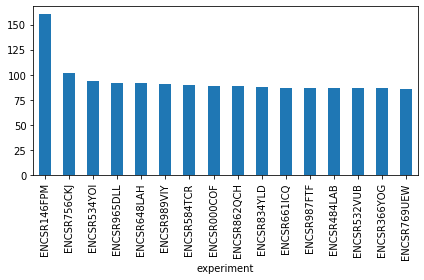

In [6]:
best_experiments.plot(kind='bar')
plt.tight_layout()
plt.savefig('experiment_plot.png', dpi=300)

In [7]:
best_labs = unique_downloads_df.groupby('lab').size().sort_values(ascending=False)[:16]

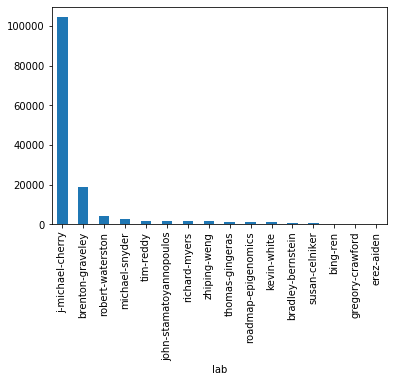

In [8]:
best_labs.plot(kind='bar')
